In [1]:
#Banking Loan Approval ratings
#Shaquiel Pashtunyar
#DSC630 Term Project

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Import datasets
LoanDefault = pd.read_csv('application_data.csv')

In [4]:
LoanDefault.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
LoanDefault.shape

(307511, 122)

In [6]:
print('From my initial look at the data we see that the data has 307,511 entries with 122 variables')

From my initial look at the data we see that the data has 307,511 entries with 122 variables


In [7]:
#the data set came with a description as well
LoanDesc =  pd.read_csv('columns_description.csv')

In [8]:
LoanDesc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [9]:
LoanDefault.isnull().values.sum()

9152465

In [10]:
print('there are 9 million null values on the data set we have picked')

there are 9 million null values on the data set we have picked


In [11]:
LoanDefaultCount = LoanDefault["TARGET"].value_counts()

In [12]:
LoanDefaultCount

0    282686
1     24825
Name: TARGET, dtype: int64

In [13]:
print('We can see that the loan default summary has 24825 targetted loan defaulters, thats 8% of all loans')

We can see that the loan default summary has 24825 targetted loan defaulters, thats 8% of all loans


In [14]:
LoanDefault.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [15]:
print('What we know about the data, we can see that there are 300000 results, and 160 variables to look at. Although that seems apealing, there are over 9 million null values, and flags and variables that are buried in this dataset. Although there could be some good information in this, it might be easier to start smaller with another data set and come back at a more apporpriate time, as the data munging effort for this large of the data set could go on for quite some time')

What we know about the data, we can see that there are 300000 results, and 160 variables to look at. Although that seems apealing, there are over 9 million null values, and flags and variables that are buried in this dataset. Although there could be some good information in this, it might be easier to start smaller with another data set and come back at a more apporpriate time, as the data munging effort for this large of the data set could go on for quite some time


In [16]:
print('Before we begin the data munging experience lets take a look at a second, much smaller dataset on the same topic, maybe it will be easier to work with and have less data to munge')

Before we begin the data munging experience lets take a look at a second, much smaller dataset on the same topic, maybe it will be easier to work with and have less data to munge


In [17]:
LoanWork2 = pd.read_csv('Default_fin.csv')

In [18]:
LoanWork2.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [19]:
LoanWork2.shape

(10000, 5)

In [20]:
print('The second data set has only 10,000 rows and only looks at 4 variables, did the invidual default on the loan, their salary, bank balance, and if they are employed')

The second data set has only 10,000 rows and only looks at 4 variables, did the invidual default on the loan, their salary, bank balance, and if they are employed


In [21]:
print('Lets take a look at this data and see what we can make of it')

Lets take a look at this data and see what we can make of it


In [22]:
LoanWork2.isnull().values.sum()

0

In [23]:
print('Data has no null values making it good to work with')

Data has no null values making it good to work with


In [24]:
LoanWork2.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [25]:
print('Data does show some people defaulting on their loans so lets dig into that')

Data does show some people defaulting on their loans so lets dig into that


In [26]:
import matplotlib.pyplot as plt
print(' We can make a plot to visualize the number of defaulted loans')

 We can make a plot to visualize the number of defaulted loans


In [27]:
Loan2DefaultCount = LoanWork2["Defaulted?"].value_counts()

In [28]:
Loan2DefaultCount

0    9667
1     333
Name: Defaulted?, dtype: int64

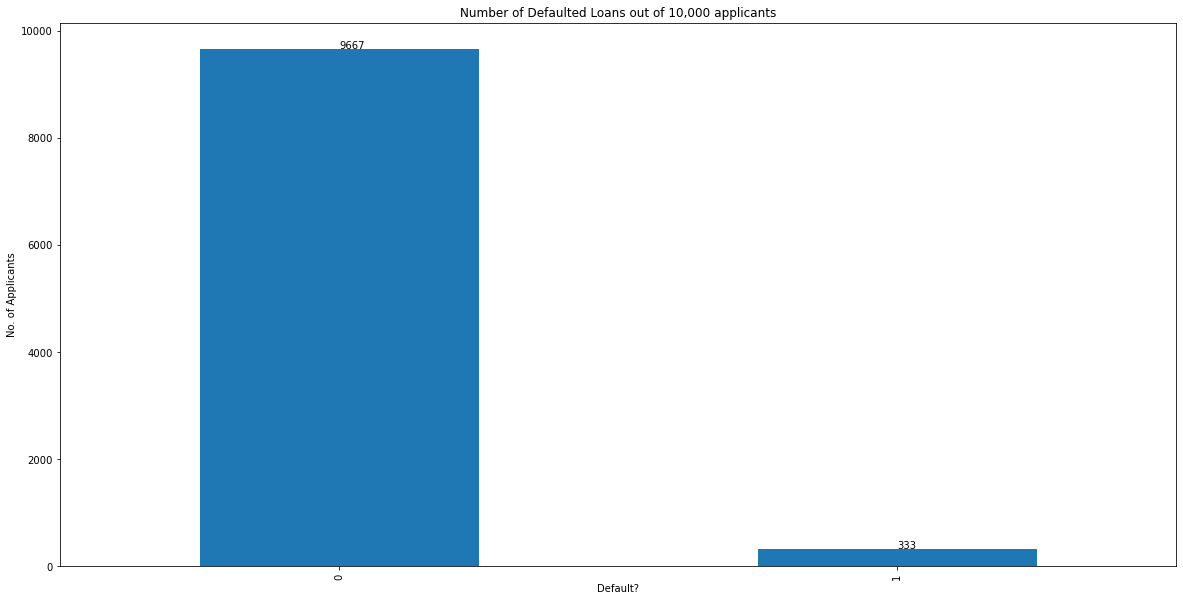

In [29]:
plt.figure(figsize=(20,10))
ax = Loan2DefaultCount.plot(kind='bar')
plt.xlabel("Default?")
plt.ylabel("No. of Applicants")
ax.set_title("Number of Defaulted Loans out of 10,000 applicants")
x= ["Not Defaulted", "Defaulted"]
y= [9667,333]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(x, y)

In [30]:
print('From the above chart we can see that 333 applicants did default on the loan and we have something to work with, now we can start building a model to predict this')

From the above chart we can see that 333 applicants did default on the loan and we have something to work with, now we can start building a model to predict this


array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Employed'}>],
       [<AxesSubplot:title={'center':'Bank Balance'}>,
        <AxesSubplot:title={'center':'Annual Salary'}>],
       [<AxesSubplot:title={'center':'Defaulted?'}>, <AxesSubplot:>]],
      dtype=object)

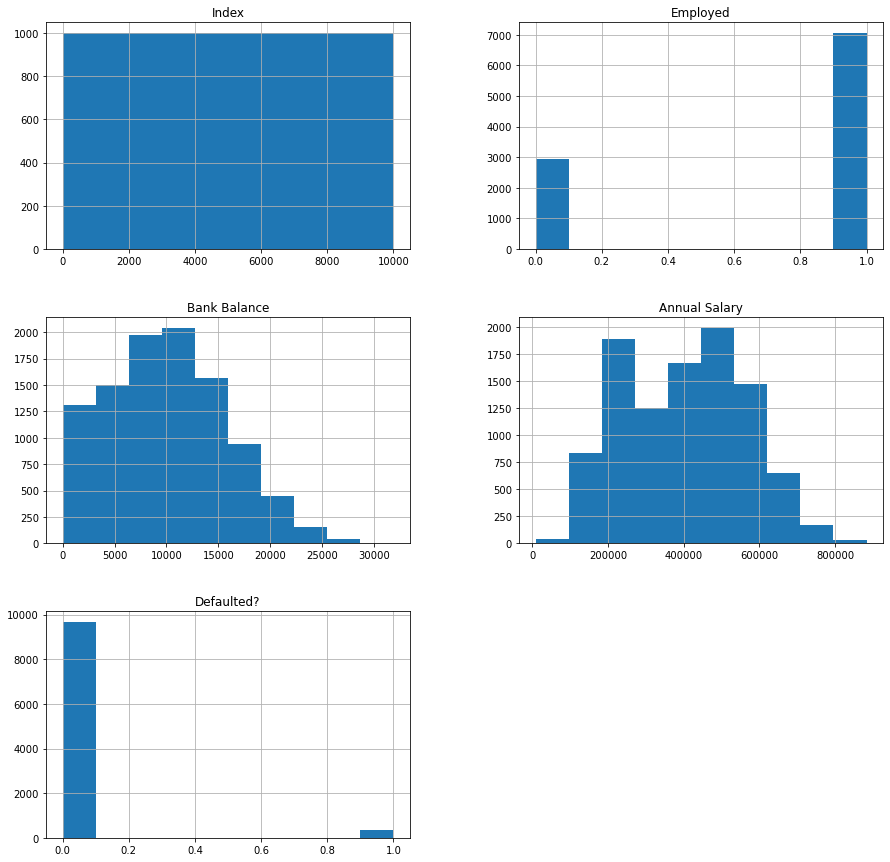

In [31]:
#we can also get more histograms to dig into the data a little more using a basic histogram function, since there are not too many variables. This is quicker but less descriptive of a way to look at the data
LoanWork2.hist(figsize=(15,15))

<AxesSubplot:>

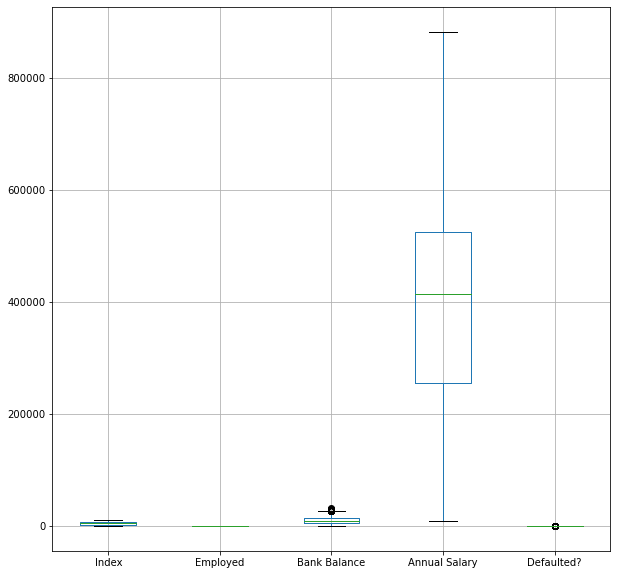

In [32]:
#We can also look at the basic boxplot function to see the spread in salary and bank balance
LoanWork2.boxplot(figsize=(10,10))

In [33]:
print('Interesting finding here is that the salary range is quite big, but the bank balance of most people is usuallyt less than 10,000. So most people arent hoarding cash in their bank accounts')

Interesting finding here is that the salary range is quite big, but the bank balance of most people is usuallyt less than 10,000. So most people arent hoarding cash in their bank accounts


In [34]:
#importing seaborn for more chart options
import seaborn as sns

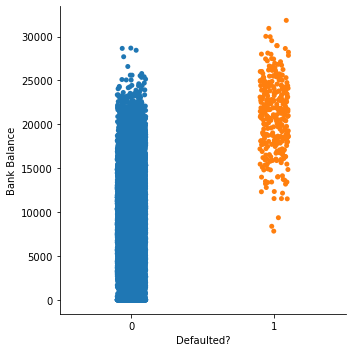

In [35]:
#plotting bank balance to the default rate
sns.catplot(data=LoanWork2,x="Defaulted?",y="Bank Balance")

In [36]:
print('Interestingly enough, those who defaulted on their loans had more money in their bank balancethan others, this makes sense as the loan is smaller, you likely would not default')

Interestingly enough, those who defaulted on their loans had more money in their bank balancethan others, this makes sense as the loan is smaller, you likely would not default


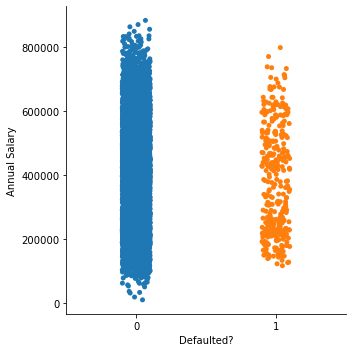

In [37]:
#plotting salary to the default rate
sns.catplot(data=LoanWork2,x="Defaulted?",y="Annual Salary")

In [38]:
print('Unlike the bank balance chart, the salary of an indiviudal seems to have little effect on their deault rate.')

Unlike the bank balance chart, the salary of an indiviudal seems to have little effect on their deault rate.


In [39]:
#Running correlation analysis after all the plotting
LoanWork2.corr()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
Index,1.000000,-0.002597,0.010342,-0.001427,-0.005135
Employed,-0.002597,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,0.010342,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,-0.001427,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.005135,-0.035420,0.350119,-0.019871,1.000000


In [40]:
print('It would appear that most things are not too correlated but the bank balance has a 35% correlation to defaulting')

It would appear that most things are not too correlated but the bank balance has a 35% correlation to defaulting


In [41]:
print(' Current learnings from just visualizations and data exploration, there are no null values and everything is accounted for in this data set. It is much cleaner and has a clear target variable. From the charts and the describe funciton, we have learned that the mean income is 400000, about 1/3 of all individuals surveyed were unemployed, most people do not save much case even with a variable salary, the default loan rate is sitting at 3.3% and the data is mostly ready to go, with all of this, lets start working towards a logistic regression for our model')

 Current learnings from just visualizations and data exploration, there are no null values and everything is accounted for in this data set. It is much cleaner and has a clear target variable. From the charts and the describe funciton, we have learned that the mean income is 400000, about 1/3 of all individuals surveyed were unemployed, most people do not save much case even with a variable salary, the default loan rate is sitting at 3.3% and the data is mostly ready to go, with all of this, lets start working towards a logistic regression for our model


In [42]:
#Start with dropping some of my columns like the index column and the defaulted so I can get some more plots to work with and get my X and Y variables
CleanerX = LoanWork2.drop(columns=["Defaulted?","Index"])
CleanerY = LoanWork2["Defaulted?"]

In [43]:
CleanerX.columns

Index(['Employed', 'Bank Balance', 'Annual Salary'], dtype='object')

In [44]:
print('I now have my X variables in comparison to my target or y, which is the Defaulted question')

I now have my X variables in comparison to my target or y, which is the Defaulted question


In [45]:
CleanerX

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


In [46]:
#emploted will need to get dummies so its a boolean variable
CleanerX = pd.get_dummies(CleanerX,columns=['Employed'])

In [47]:
CleanerX

,Bank Balance,Annual Salary,Employed_0,Employed_1
0,8754.36,532339.56,0,1
1,9806.16,145273.56,1,0
2,12882.60,381205.68,0,1
3,6351.00,428453.88,0,1
4,9427.92,461562.00,0,1
...,...,...,...,...
9995,8538.72,635908.56,0,1
9996,9095.52,235928.64,0,1
9997,10144.92,703633.92,0,1
9998,18828.12,440029.32,0,1


In [48]:
#Getting my model imported
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [49]:
#splitting the data in both testing and training sets, picking a random state number of 2 as this is my second data set
X_train,X_test,Y_train,Y_test = train_test_split(CleanerX,CleanerY,random_state=2)

In [50]:
Y_train.value_counts()

0    7234
1     266
Name: Defaulted?, dtype: int64

In [51]:
print(' We have a target train that has a good number of variables to target')

 We have a target train that has a good number of variables to target


In [52]:
X_train.shape

(7500, 4)

In [53]:
Y_train.shape

(7500,)

In [54]:
#will need smote for normaliztion and stats for scoring my results
from imblearn.over_sampling import SMOTE 
from scipy import stats

In [55]:
#To rebalance the sample size I will use the smote function which normalizes the dataset
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [56]:
#Creating my logisitic regression fit
model=linear_model.LogisticRegression(random_state=2)

In [57]:
model.fit(X_train,Y_train)
pred=model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
#took the confusion matrix formula from geeksforgeeks
print("accuracy is : ",(cm[0,0]+cm[1,1])/sum(sum(cm)))

accuracy is :  0.6772


In [58]:
#additional charting functions
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\spashtunyar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


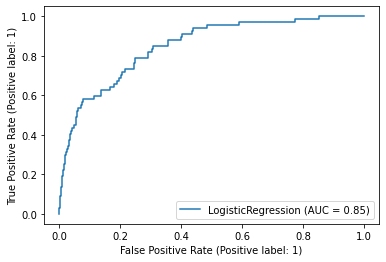

In [59]:
#ROC Curve to look at the flase positive rate
plot_roc_curve(model,X_test,Y_test)

C:\Users\spashtunyar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


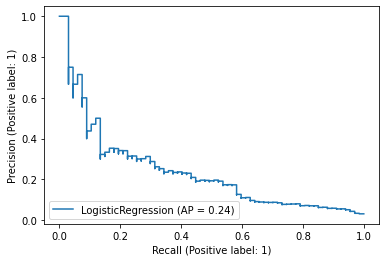

In [60]:
#Precision recall curve to look at preciseness
plot_precision_recall_curve(model,X_test,Y_test)

In [61]:
#Time to score my analysis
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)
rmse = np.sqrt(mse)

In [63]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.32
Mean squared error: 0.32
Root mean squared error: 0.57


In [64]:
print("R2 for the Log Regression is :",model.score(X_test,Y_test))

R2 for the Log Regression is : 0.6772


In [65]:
print("With the analysis coming to an initial conclusion, we see that we are getting about 65-70% accuracy, correctly predicting 2/3rds of the predictions made. This is not the best result and there are a number of reasons. We may need more variables to create a better model, this would be the route of using the other data set. Another option is creating a second model using another method. Some contendors are decision tree or Nural network to see their results.")

With the analysis coming to an initial conclusion, we see that we are getting about 65-70% accuracy, correctly predicting 2/3rds of the predictions made. This is not the best result and there are a number of reasons. We may need more variables to create a better model, this would be the route of using the other data set. Another option is creating a second model using another method. Some contendors are decision tree or Nural network to see their results.
